<a href="https://colab.research.google.com/github/Luke-code2025/Dataanalysis-using-panda-and-matplotLib/blob/main/Ebolaprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  cases   No. Observations:                   15
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -71.563
Date:                Fri, 06 Jun 2025   AIC                            155.127
Time:                        12:17:37   BIC                            158.961
Sample:                    01-01-2014   HQIC                           154.772
                         - 03-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4040      0.801      1.753      0.080      -0.166       2.974
ar.L2         -0.9449      2.343     -0.403      0.687      -5.538       3.648
ar.L3          0.0975      4.860      0.020      0.9

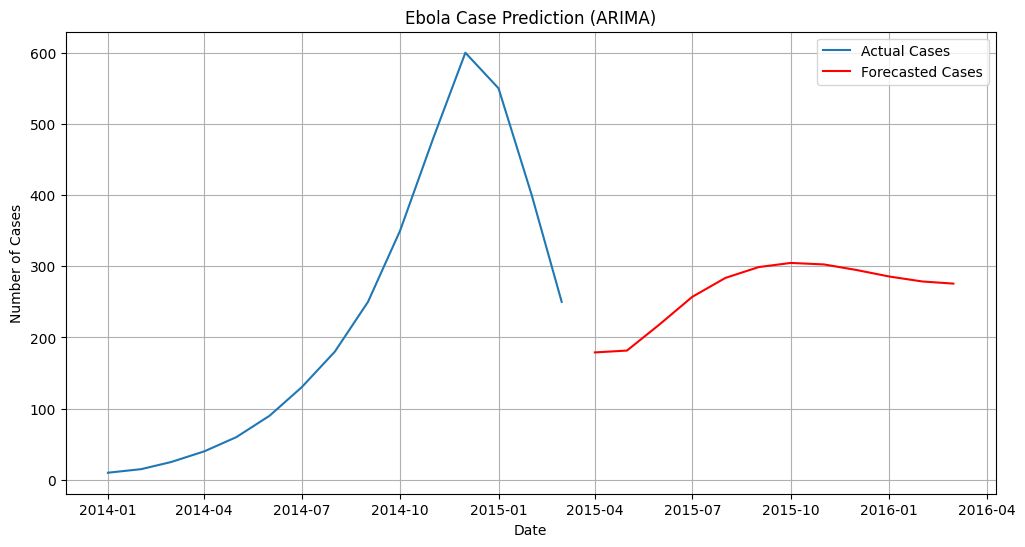

In [1]:
# prompt: Generate a machine learning code that would help predict the outbreak of Ebola virus in Aftrica

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import requests

# Function to fetch Ebola data (replace with a real data source)
def fetch_ebola_data():
    # This is a placeholder. You would need to find a reliable data source.
    # Example: You might fetch data from a public health organization's API.
    # For demonstration, let's create some dummy data.
    data = {
        'date': pd.to_datetime(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01',
                              '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
                              '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01']),
        'cases': [10, 15, 25, 40, 60, 90, 130, 180, 250, 350, 480, 600, 550, 400, 250]
    }
    df = pd.DataFrame(data)
    df.set_index('date', inplace=True)
    return df

# Fetch and prepare data
ebola_data = fetch_ebola_data()

# Check if data was fetched successfully
if ebola_data is None or ebola_data.empty:
    print("Could not fetch or process Ebola data. Please check the data source.")
else:
    # Fit an ARIMA model
    # The parameters (p, d, q) need to be tuned based on the data's characteristics.
    # This is a basic example.
    try:
        model = ARIMA(ebola_data['cases'], order=(5, 1, 0))
        model_fit = model.fit()

        # Summarize the model
        print(model_fit.summary())

        # Make predictions
        # Predict the next 12 months
        forecast_steps = 12
        forecast = model_fit.predict(start=len(ebola_data), end=len(ebola_data) + forecast_steps - 1)

        # Create a date index for the forecast
        forecast_index = pd.date_range(start=ebola_data.index[-1], periods=forecast_steps + 1, freq='MS')[1:]

        # Plot actual vs. predicted cases
        plt.figure(figsize=(12, 6))
        plt.plot(ebola_data.index, ebola_data['cases'], label='Actual Cases')
        plt.plot(forecast_index, forecast, label='Forecasted Cases', color='red')
        plt.title('Ebola Case Prediction (ARIMA)')
        plt.xlabel('Date')
        plt.ylabel('Number of Cases')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"An error occurred during model fitting or prediction: {e}")

